In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,6)         # handles matplotlib values

In [21]:
# Read data
df = pd.read_csv('driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [22]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [23]:
# Summary of the dataset
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [24]:
# Perform KMeans Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)        # Minimum number of clusters that can exist in a dataset

# Drop the id column since it is not relevant when forming clusters
df_analysis = df.drop('id', axis=1)  

# Fit the model into the data
kmeans.fit(df_analysis)  

# Determine the cluster center vectors
print("Cluster centers:")
kmeans.cluster_centers_

Cluster centers:


array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [25]:
# Display the labels
print("Labels:", kmeans.labels_)
print("Length of the labels:", len(kmeans.labels_))

Labels: [0 0 0 ... 1 1 1]
Length of the labels: 4000


In [26]:
# Return how many unique drivers are there in the first and second cluster 
unique,counts = np.unique(kmeans.labels_, return_counts=True)

# Zip the unique number of cluster and their frequency counts within a dictionary
print(dict(zip(unique,counts)))

{0: 3200, 1: 800}


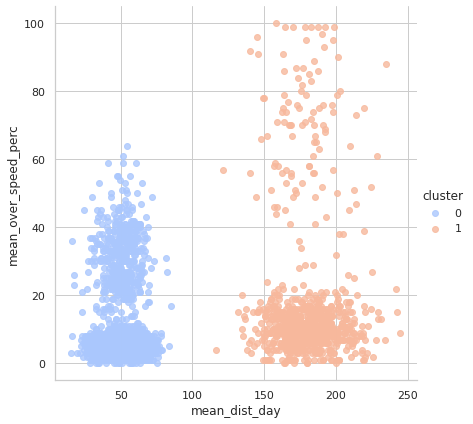

In [27]:
# Assign a new column with the labels given by KMeans
df_analysis['cluster']=kmeans.labels_

# Plot the clusters
sns.set_style('whitegrid')     # best suited for heavy data elements
sns.lmplot('mean_dist_day','mean_over_speed_perc', data=df_analysis, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)                      

In [28]:
# Check if we get a more accurate result with more clusters

# Initialize K Means with 4 clusters
kmeans_4 = KMeans(n_clusters=4)

# Fit the model
kmeans_4.fit(df.drop('id', axis=1))

# Determine the cluster center vectors
print("Cluster centers:")
print(kmeans_4.cluster_centers_)

Cluster centers:
[[ 50.49167849  32.49172577]
 [180.34311782  10.52011494]
 [ 49.9799964    5.22434282]
 [177.83509615  70.28846154]]


In [29]:
# Return how many unique drivers are there in the clusters 
unique,counts = np.unique(kmeans_4.labels_, return_counts=True)

# Zip the unique number of cluster and their frequency counts within a dictionary
print(dict(zip(unique,counts)))

{0: 425, 1: 696, 2: 2775, 3: 104}


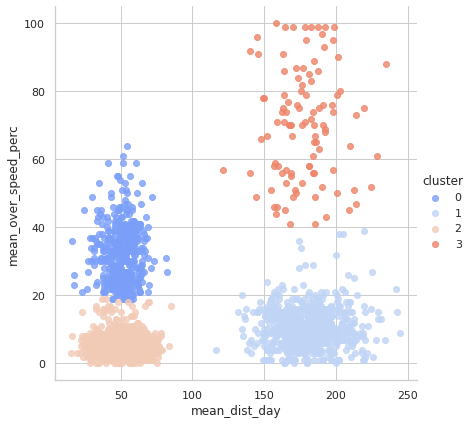

In [30]:
# Assign a new column with the labels given by KMeans
df_analysis['cluster']=kmeans_4.labels_

# Plot the clusters
sns.set_style('whitegrid')     # best suited for heavy data elements
sns.lmplot('mean_dist_day','mean_over_speed_perc', data=df_analysis, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)  